## Importando a base e as ferramentas

In [1]:
# Passo 1 : Importando bibliotecas

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\USER\Desktop\TCC\Dados-TCC.xlsx')  

### Limpezado dos dados

In [3]:
#Passo 2: Importando e Limpandando dados
 
display(data)

,Preço do Terreno (R$),Preço do Metro Quadrado (R$/m²),Bairro,CEP,De Frente para Praia,Logística de Pessoas,Logística de Veículos,Tipo de Solo
0,1200000,6000,Copacabana,22020-010,Sim,Alta,Alta,Arenoso
1,1000000,5000,Ipanema,22420-040,Sim,Alta,Média,Argiloso
2,1500000,7500,Leblon,22441-010,Sim,Média,Alta,Silte
3,800000,4000,Botafogo,22290-070,Não,Alta,Média,Argiloso
4,1400000,7000,Barra da Tijuca,22793-081,Sim,Alta,Alta,Arenoso
...,...,...,...,...,...,...,...,...
552,280000,1400,Colégio,21645-280,Não,Média,Média,Argiloso
553,380000,1900,Santo Cristo,20220-450,Não,Média,Média,Argiloso
554,360000,1800,Vaz Lobo,21350-380,Não,Média,Média,Argiloso
555,300000,1500,Tomás Coelho,20780-220,Não,Média,Média,Argiloso


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Preço do Terreno (R$)            557 non-null    int64 
 1   Preço do Metro Quadrado (R$/m²)  557 non-null    int64 
 2   Bairro                           555 non-null    object
 3   CEP                              556 non-null    object
 4   De Frente para Praia             555 non-null    object
 5   Logística de Pessoas             555 non-null    object
 6   Logística de Veículos            556 non-null    object
 7   Tipo de Solo                     555 non-null    object
dtypes: int64(2), object(6)
memory usage: 34.9+ KB


### Limpeza dos dados

In [5]:
# Verficando os números nulos da base
data.isnull().sum()

Preço do Terreno (R$)              0
Preço do Metro Quadrado (R$/m²)    0
Bairro                             2
CEP                                1
De Frente para Praia               2
Logística de Pessoas               2
Logística de Veículos              1
Tipo de Solo                       2
dtype: int64

In [6]:
# Tratando valores vazios
data[data.isnull().any(axis=1)]

,Preço do Terreno (R$),Preço do Metro Quadrado (R$/m²),Bairro,CEP,De Frente para Praia,Logística de Pessoas,Logística de Veículos,Tipo de Solo
13,800000,4000,Botafogo,22290-070,NaN,NaN,Média,Argiloso
19,1050000,5250,NaN,NaN,Sim,Média,Alta,Arenoso
114,1210000,6050,Copacabana,22020-020,NaN,Alta,Alta,Arenoso
325,360000,1800,NaN,21350-380,Não,Média,Média,Argiloso
352,330000,1650,Campo dos Afonsos,22775-009,Não,NaN,NaN,Argiloso
370,300000,1500,Acari,21530-230,Não,Média,Média,NaN
556,430000,2150,Pedra de Guaratiba,23020-410,Não,Alta,Alta,NaN


In [7]:
# Excluindo colunas que não tinham informações
data = data.dropna()

In [8]:
data.isnull().sum()

Preço do Terreno (R$)              0
Preço do Metro Quadrado (R$/m²)    0
Bairro                             0
CEP                                0
De Frente para Praia               0
Logística de Pessoas               0
Logística de Veículos              0
Tipo de Solo                       0
dtype: int64

### Analise dos terrenos

In [9]:
# Passo 3: Análise e Pontuação dos Terrenos
# Supondo que o preço do terreno seja o critério mais importante, vamos normalizá-lo e atribuir pesos aos outros critérios
peso_preco_terreno = 0.5
peso_log_pessoas = 0.2
peso_log_veiculos = 0.2
peso_tipo_solo = 0.1


In [10]:
# Normalização do preço do terreno
data['Preço do Terreno (Normalizado)'] = (data['Preço do Terreno (R$)'] - 
                                          data['Preço do Terreno (R$)'].min()) / (
                                         data['Preço do Terreno (R$)'].max() - 
                                         data['Preço do Terreno (R$)'].min())

In [11]:
# Cálculo da pontuação para cada terreno
data['Pontuação'] = 0

# Pontuação baseada no preço do terreno (considerando normalização)
data['Pontuação'] += peso_preco_terreno * ((data['Preço do Terreno (R$)'] - data['Preço do Terreno (R$)'].min()) /
                                           (data['Preço do Terreno (R$)'].max() - data['Preço do Terreno (R$)'].min()))

# Pontuação extra se a logística de pessoas é alta
data['Pontuação'] += peso_log_pessoas * data['Logística de Pessoas'].apply(lambda x: 1 if x == 'Alta' else 0)

# Pontuação extra se a logística de veículos é alta
data['Pontuação'] += peso_log_veiculos * data['Logística de Veículos'].apply(lambda x: 1 if x == 'Alta' else 0)

# Pontuação extra se o tipo de solo é arenoso
data['Pontuação'] += peso_tipo_solo * data['Tipo de Solo'].apply(lambda x: 1 if x == 'Arenoso' else 0)


In [12]:
# Passo 4: Seleção do Melhor Terreno
melhor_terreno = data.iloc[data['Pontuação'].idxmax()]


In [13]:
# Ordenar os terrenos pela pontuação em ordem decrescente
top_terrenos = data.sort_values(by='Pontuação', ascending=False)

# Selecionar os top 3 terrenos
top3_terrenos = top_terrenos.head(3)

# Exibir os top 3 terrenos de forma mais legível
print("Top 3 Terrenos:")
for i, terreno in top3_terrenos.iterrows():
    print(f"Terreno {i + 1}:")
    print(f"Bairro: {terreno['Bairro']}")
    print(f"Preço do Terreno (R$): {terreno['Preço do Terreno (R$)']}")
    print(f"Preço do Metro Quadrado (R$/m²): {terreno['Preço do Metro Quadrado (R$/m²)']}")
    print(f"CEP: {terreno['CEP']}")
    print(f"De Frente para Praia: {'Sim' if terreno['De Frente para Praia'] else 'Não'}")
    print(f"Logística de Pessoas: {terreno['Logística de Pessoas']}")
    print(f"Logística de Veículos: {terreno['Logística de Veículos']}")
    print(f"Tipo de Solo: {terreno['Tipo de Solo']}\n")



Top 3 Terrenos:
Terreno 524:
Bairro: Laranjeiras
Preço do Terreno (R$): 5200000
Preço do Metro Quadrado (R$/m²): 26000
CEP: 22240-000
De Frente para Praia: Sim
Logística de Pessoas: Alta
Logística de Veículos: Alta
Tipo de Solo: Arenoso

Terreno 530:
Bairro: Vargem Grande
Preço do Terreno (R$): 4300000
Preço do Metro Quadrado (R$/m²): 21500
CEP: 22785-030
De Frente para Praia: Sim
Logística de Pessoas: Alta
Logística de Veículos: Alta
Tipo de Solo: Arenoso

Terreno 526:
Bairro: Flamengo
Preço do Terreno (R$): 4200000
Preço do Metro Quadrado (R$/m²): 21000
CEP: 22210-030
De Frente para Praia: Sim
Logística de Pessoas: Alta
Logística de Veículos: Alta
Tipo de Solo: Arenoso



In [14]:
# Exibir o top 1 terreno
print("Top 1 Terreno:")
print(melhor_terreno)


Top 1 Terreno:
Preço do Terreno (R$)                    4300000
Preço do Metro Quadrado (R$/m²)            21500
Bairro                             Vargem Grande
CEP                                    22785-030
De Frente para Praia                         Não
Logística de Pessoas                        Alta
Logística de Veículos                       Alta
Tipo de Solo                             Arenoso
Preço do Terreno (Normalizado)          0.818548
Pontuação                               0.909274
Name: 529, dtype: object


In [15]:
# Passo 5: Modelagem de Valorização do Terreno
# Definindo a taxa de valorização de 1 ano
taxa_1_ano = 0.0142  # Taxa de valorização de 1,42% ao ano

# Dados de preço do terreno ao longo do tempo
anos = np.array([0, 1, 5, 10, 20]).reshape(-1, 1)  # Anos desde a compra
preco_inicial = melhor_terreno['Preço do Terreno (R$)']
preco_terreno = np.array([preco_inicial,
                          preco_inicial * (1 + taxa_1_ano),  # Valorização de 1,42% ao ano
                          preco_inicial * (1 + taxa_1_ano) ** 5,  # Valorização de 1,42% ao ano por 5 anos
                          preco_inicial * (1 + taxa_1_ano) ** 10,  # Valorização de 1,42% ao ano por 10 anos
                          preco_inicial * (1 + taxa_1_ano) ** 20]).reshape(-1, 1)  # Valorização de 1,42% ao ano por 20 anos

# Calcular a porcentagem de valorização em relação ao valor inicial
porcentagem_valorizacao = ((preco_terreno - preco_inicial) / preco_inicial) * 100

# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(anos, preco_terreno)

# Previsão de preço do terreno para os próximos anos
previsao_anos = np.array([1, 5, 10, 20]).reshape(-1, 1)
previsao_valorizacao = modelo.predict(previsao_anos)

# Exibir as previsões
print("Previsão de Valorização do Terreno:")
for ano, valor, porcentagem in zip([1, 5, 10, 20], previsao_valorizacao, porcentagem_valorizacao):
    print(f"Em {ano} ano(s): R${valor[0]:,.2f} ({porcentagem[0]:.2f}% de valorização)")




Previsão de Valorização do Terreno:
Em 1 ano(s): R$4,351,229.27 (0.00% de valorização)
Em 5 ano(s): R$4,631,358.69 (1.42% de valorização)
Em 10 ano(s): R$4,981,520.46 (7.30% de valorização)
Em 20 ano(s): R$5,681,844.01 (15.14% de valorização)


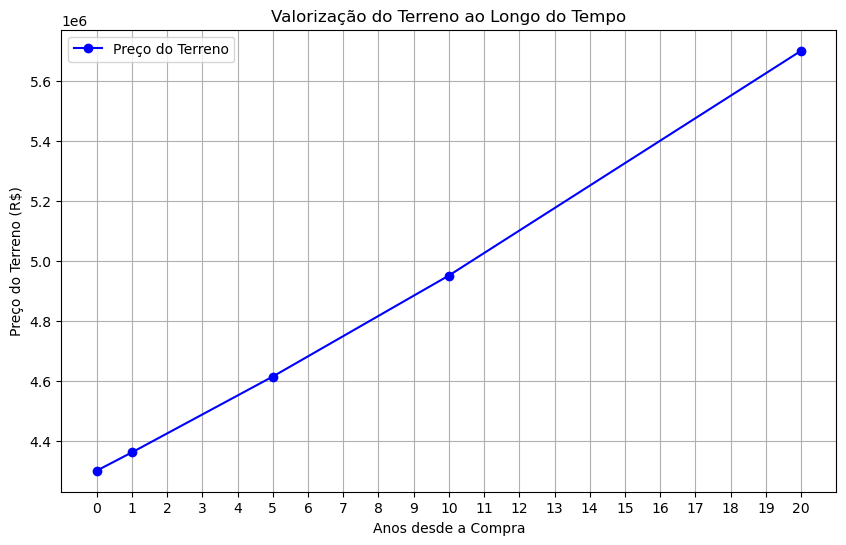

In [16]:
# Passo 6: Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(anos, preco_terreno, marker='o', linestyle='-', color='b', label='Preço do Terreno')
plt.title('Valorização do Terreno ao Longo do Tempo')
plt.xlabel('Anos desde a Compra')
plt.ylabel('Preço do Terreno (R$)')
plt.xticks(np.arange(0, 21, step=1))  # Atualizado para incluir 20 anos
plt.grid(True)
plt.legend()
plt.show()


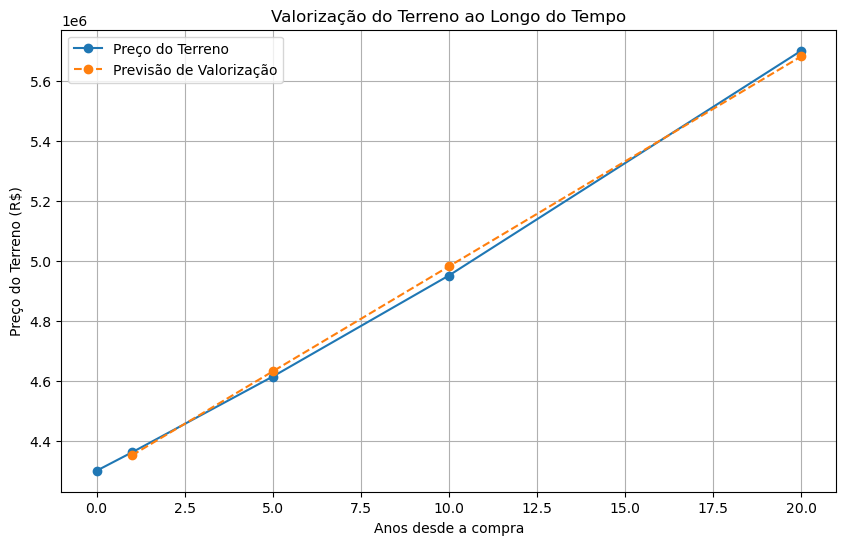

In [17]:
# Passo 6: Visualização dos Resultados
# Gráfico de valorização do terreno ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(anos, preco_terreno, 'o-', label='Preço do Terreno')
plt.plot(previsao_anos, previsao_valorizacao, 'o--', label='Previsão de Valorização')
plt.title('Valorização do Terreno ao Longo do Tempo')
plt.xlabel('Anos desde a compra')
plt.ylabel('Preço do Terreno (R$)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Passo 7 Visualizando a localização

from geopy.geocoders import Nominatim

# Lista de CEPs para consultar
ceps = ['22240-000', '22785-030', '22210-030']

# Criar uma instância do geolocalizador Nominatim
geolocator = Nominatim(user_agent="geolocalização")

# Lista para armazenar as coordenadas
coordenadas_top3 = []

# Iterar sobre os CEPs e obter as coordenadas
for cep in ceps:
    # Consultar as coordenadas usando o CEP
    location = geolocator.geocode(cep, addressdetails=True)
    
    # Verificar se a localização foi encontrada
    if location:
        # Obter as coordenadas (latitude e longitude)
        latitude = location.latitude
        longitude = location.longitude
        
        # Adicionar as coordenadas à lista
        coordenadas_top3.append((latitude, longitude))

# Exibir as coordenadas
for i, (lat, lon) in enumerate(coordenadas_top3, start=1):
    print(f"Terreno {i}: Latitude {lat}, Longitude {lon}")



Terreno 1: Latitude -22.93280367142857, Longitude -43.18239427142857
Terreno 2: Latitude 48.5018486, Longitude 9.0498594
Terreno 3: Latitude -22.930106288461538, Longitude -43.174042396153844


In [19]:
# Criar um mapa centrado em uma localização inicial
import folium
mapa = folium.Map(location=[-22.9035, -43.2096], zoom_start=10)

# Adicionar marcadores para cada localização
for i, (lat, lon) in enumerate(coordenadas_top3, start=1):
    if i == 2:
        folium.Marker([lat, lon], popup=f"Terreno {i} - Localização Incorreta", icon=folium.Icon(color='red')).add_to(mapa)
    else:
        folium.Marker([lat, lon], popup=f"Terreno {i}").add_to(mapa)

# Exibir o mapa
mapa
